# Data Science Salary Analysis
This notebook explores factors affecting data science salaries, identifies top-paying locations, and uses a heatmap to highlight relationships. 

## Importing Libraries and Reading Files

In [1]:
# Importing packeges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
data = pd.read_csv('Downloads/eda_data.csv')
data.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,age,python_yn,R_yn,spark,aws,excel,job_simp,seniority,desc_len,num_comp
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,...,47,1,0,0,0,1,data scientist,na,2536,0
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,...,36,1,0,0,0,0,data scientist,na,4783,0
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,...,10,1,0,1,0,1,data scientist,na,3461,0
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,...,55,1,0,0,0,0,data scientist,na,3883,3
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,...,22,1,0,0,0,1,data scientist,na,2728,3


## Data Preparation

In [2]:
# Drop unnecessary data
data = data.drop(columns=['Unnamed: 0', 'Job Description', 'Company Name', 'Competitors'])
data = data.dropna()

# Convert salary estimates to numerical values
data['min_salary'] = data['min_salary'].astype(float)
data['max_salary'] = data['max_salary'].astype(float)
data['avg_salary'] = data['avg_salary'].astype(float)

# basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          742 non-null    object 
 1   Salary Estimate    742 non-null    object 
 2   Rating             742 non-null    float64
 3   Location           742 non-null    object 
 4   Headquarters       742 non-null    object 
 5   Size               742 non-null    object 
 6   Founded            742 non-null    int64  
 7   Type of ownership  742 non-null    object 
 8   Industry           742 non-null    object 
 9   Sector             742 non-null    object 
 10  Revenue            742 non-null    object 
 11  hourly             742 non-null    int64  
 12  employer_provided  742 non-null    int64  
 13  min_salary         742 non-null    float64
 14  max_salary         742 non-null    float64
 15  avg_salary         742 non-null    float64
 16  company_txt        742 non

In [11]:
# selecting only numerical data
num_data = data.select_dtypes(include=['float64', 'int64'])

# Summary Statistics
print(num_data.describe())

# Showing Mean, Meadian, Standard Deviation, Skewness and Kurtosis of Every Column
for column in num_data.columns:
    print(f"\n{column}:")
    print(f"Mean: {num_data[column].mean()}")
    print(f"Median: {num_data[column].median()}")
    print(f"Standard Deviation: {num_data[column].std()}")
    print(f"Skewness: {num_data[column].skew()}")
    print(f"Kurtosis: {num_data[column].kurt()}")


           Rating      Founded      hourly  employer_provided  min_salary  \
count  742.000000   742.000000  742.000000         742.000000  742.000000   
mean     3.618868  1837.154987    0.032345           0.022911   74.719677   
std      0.801210   497.183763    0.177034           0.149721   30.980593   
min     -1.000000    -1.000000    0.000000           0.000000   15.000000   
25%      3.300000  1939.000000    0.000000           0.000000   52.000000   
50%      3.700000  1988.000000    0.000000           0.000000   69.500000   
75%      4.000000  2007.000000    0.000000           0.000000   91.000000   
max      5.000000  2019.000000    1.000000           1.000000  202.000000   

       max_salary  avg_salary  same_state         age   python_yn        R_yn  \
count  742.000000  742.000000  742.000000  742.000000  742.000000  742.000000   
mean   128.149596  100.626011    0.557951   46.591644    0.528302    0.002695   
std     45.220324   38.855948    0.496965   53.778815    0.4995

## Identifying factors most affect data science salaries

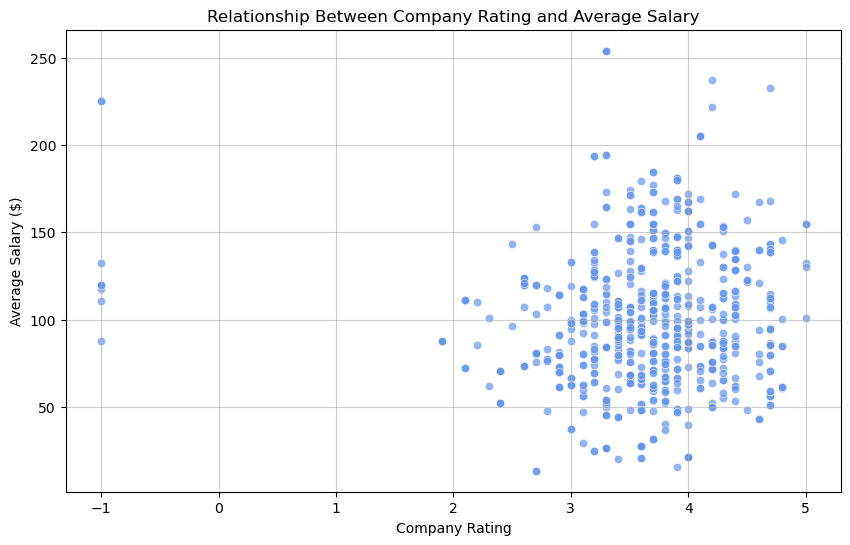

In [6]:
# Function to create a scatter plot showing the relationship between average salary and company rating
def plot_avg_salary_vs_rating():
    """Plots a scatter plot of average salary versus company rating."""
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=data['Rating'], y=data['avg_salary'], color = 'cornflowerblue', alpha=0.7)
    plt.title('Relationship Between Company Rating and Average Salary')
    plt.xlabel('Company Rating')
    plt.ylabel('Average Salary ($)')
    plt.grid(True, alpha=0.6)
    plt.show()

# Calling function
plot_avg_salary_vs_rating()

## Determining states offer the highest paying data science jobs

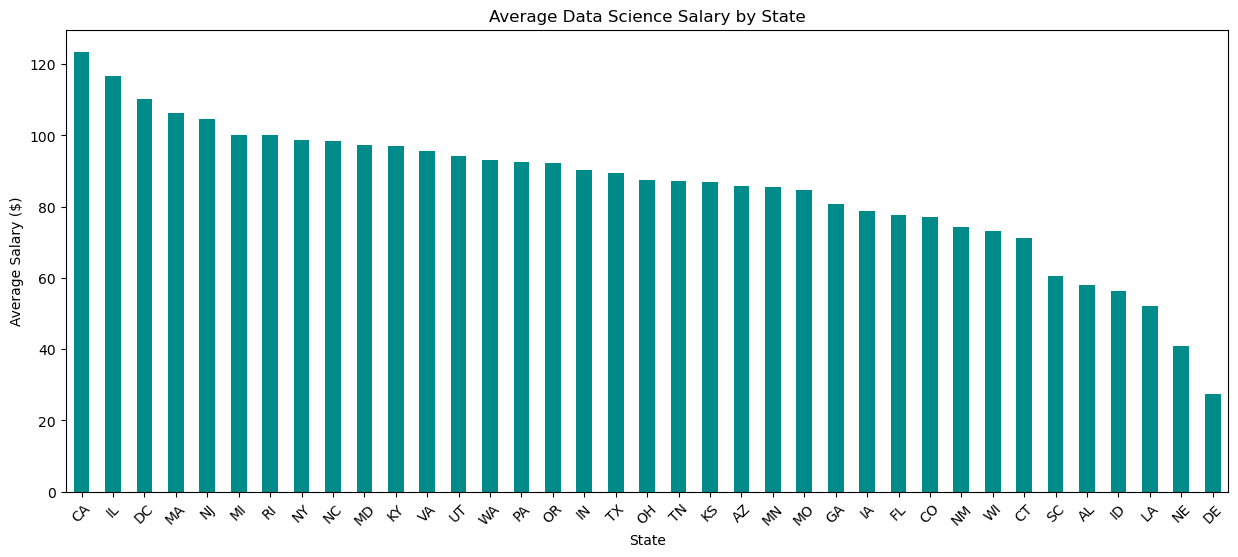

In [5]:
# Function to plot average salaries by state
def plot_avg_salary_by_state():
    """Plots a bar chart of average salaries by state."""
    state_salary = data.groupby('job_state')['avg_salary'].mean().sort_values(ascending=False)
    plt.figure(figsize=(15, 6))
    state_salary.plot(kind='bar', color='darkcyan')
    plt.title('Average Data Science Salary by State')
    plt.ylabel('Average Salary ($)')
    plt.xlabel('State')
    plt.xticks(rotation=45)
    plt.show()

# Calling the function to plot bar chart
plot_avg_salary_by_state()

## Correlation Matrix

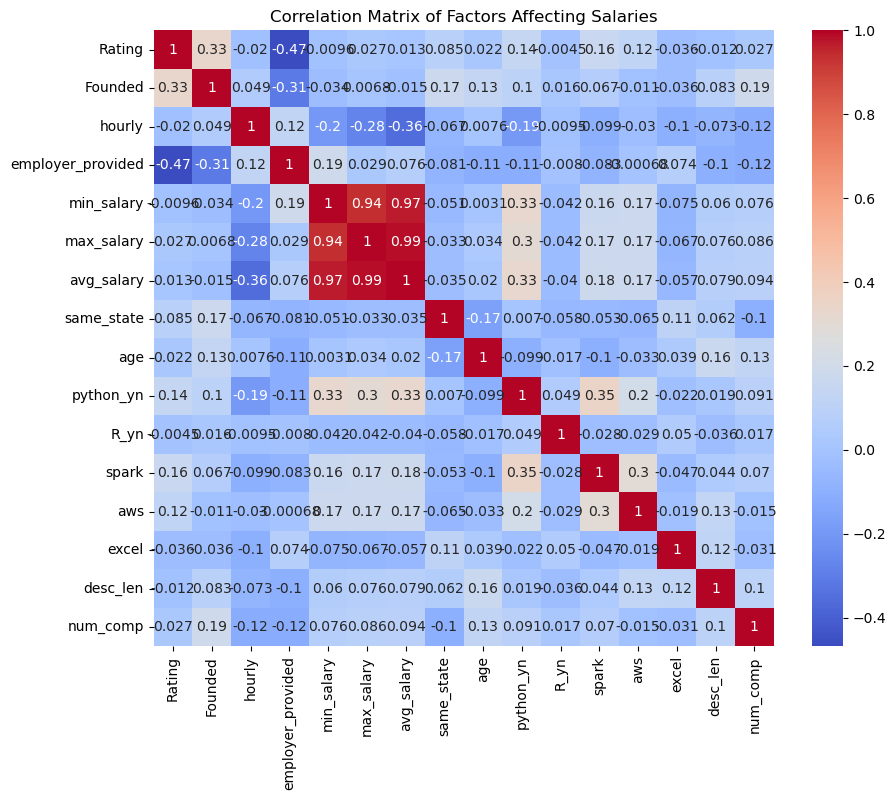

In [22]:
# Compute the correlation matrix
corr_matrix = num_data.corr()
# Function to plot the correlation heatmap
def plot_correlation_heatmap():
    """Plots a heatmap of the correlation matrix."""
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix of Factors Affecting Salaries')
    plt.show()

# Call the function to plot the heatmap
plot_correlation_heatmap()

## Conclusion
The analysis I have done with the help of different graphs and a correlation matrix I found some insights which influences data science salaries, highlights top-paying states and also different relationships between variables. I will show you the factors influenced mostly data science salaries and the relationship between the variables in the seperated report file.